In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import cv2

In [147]:
img = cv2.imread('/content/gettyimages-2155703003-612x612.jpg')

In [148]:
img.shape

(612, 408, 3)

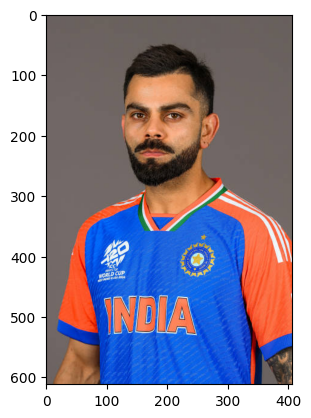

In [149]:
import matplotlib.image as mpimg

# Load an image from file
img = mpimg.imread('/content/gettyimages-2155703003-612x612.jpg')

# Display the image
plt.imshow(img)
plt.show()

In [150]:
gray = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
gray.shape

(612, 408)

array([[ 97,  97,  97, ...,  95,  95,  95],
       [ 97,  97,  97, ...,  95,  95,  95],
       [ 97,  97,  97, ...,  95,  95,  95],
       ...,
       [100, 100, 100, ..., 125, 118, 127],
       [100, 100, 100, ..., 119, 112, 120],
       [100, 100, 100, ..., 119, 113, 119]], dtype=uint8)
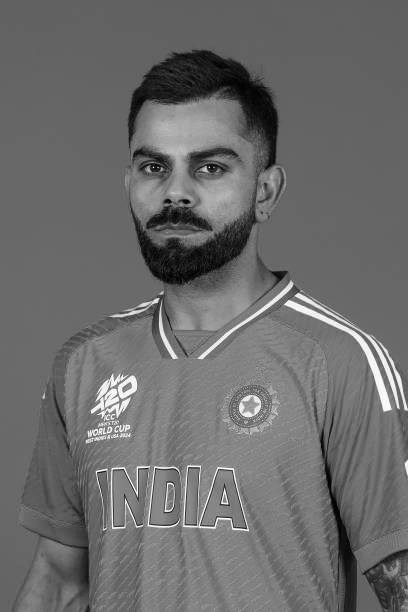

In [151]:
gray

In [152]:
face_cascade = cv2. CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3, 5)


In [153]:
faces

array([[ 95, 100, 173, 173]], dtype=int32)

In [154]:
(x,y,w,h) = faces[0]
x,y,w,h

(95, 100, 173, 173)

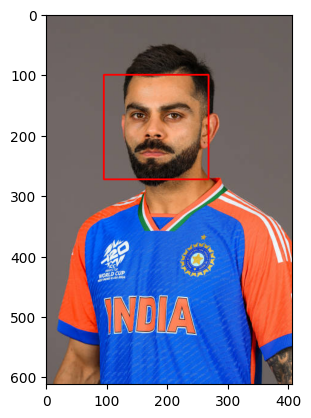

In [155]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [156]:
import cv2

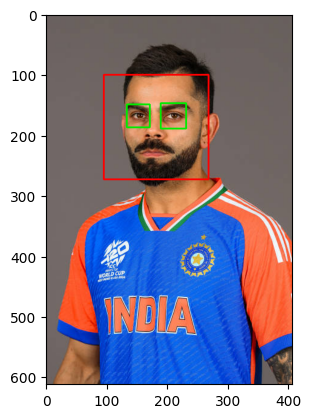

In [157]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w ,y+h),(255,0,0),2)
  roi_gray = gray[y:y+h ,x:x+w]
  roi_color = face_img[y:y+h,x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex,eye,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,eye),(ex+ew,eye+eh),(0,235.0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

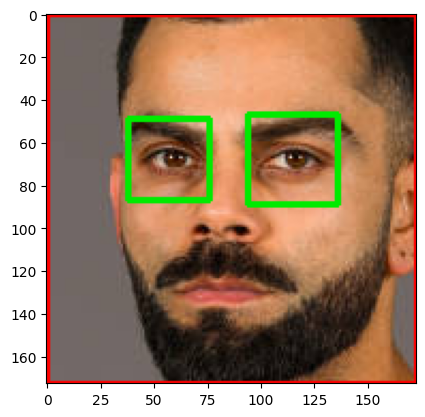

In [158]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [113]:
#write a function where i can input image
#the function returns me the cropped phase is the phase and eyes are detected clearly
#this function i can run on all my images

In [8]:
def get_cropped_image_if_2_eyes(image_path):
    # Load the cascades
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = img[y:y+h, x:x+w]
        roi_color =gray[y:y+h, x:x+w]

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None


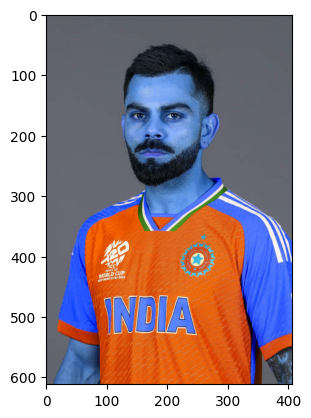

In [160]:
original_image = cv2.imread('/content/gettyimages-2155703003-612x612.jpg')
plt.imshow(original_image)

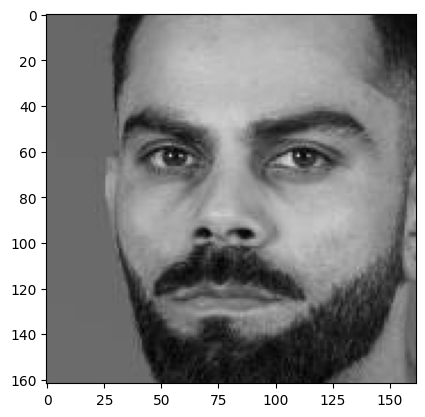

In [12]:

cropped_image = get_cropped_image_if_2_eyes('/content/gettyimages-2155703003-612x612.jpg')
if cropped_image is not None:
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("No face with two eyes detected.")

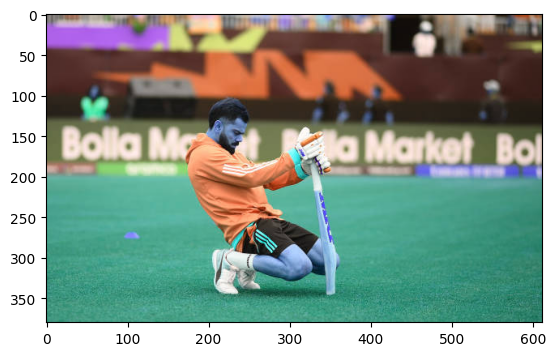

In [3]:
original_image_second = cv2.imread('/content/gettyimages-2156193580-612x612.jpg')
plt.imshow(original_image_second)

In [10]:
cropped_image = get_cropped_image_if_2_eyes('/content/gettyimages-2156193580-612x612.jpg')
if cropped_image is not None:
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("No face with two eyes detected.")

No face with two eyes detected.


In [164]:
path_to_data = '/content/drive/MyDrive/Data/dataset'
path_to_cr_data = '/content/drive/MyDrive/Data/crop data set'

In [ ]:
#stored the crop folder

In [165]:
import os

In [166]:

if not os.path.exists(path_to_data):
    print(f"The directory {path_to_data} does not exist. Please check the path.")
else:
  img_dirs = []
  for entry in os.scandir(path_to_data):
    #go through all the subdirectories within my data set folder
    if entry.is_dir():
      img_dirs.append(entry.path)



In [167]:
img_dirs

['/content/drive/MyDrive/Data/dataset/ms dhoni',
 '/content/drive/MyDrive/Data/dataset/virat',
 '/content/drive/MyDrive/Data/dataset/Messi']

In [ ]:
#create folder

In [168]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [169]:
cropped_image_dirs = []
celebrity_file_names_disct = {}

 #im gonna print celebrity name
for img_dir in img_dirs:
  count =1
  celebrity_name = img_dir.split('/')[-1] #it will give me this two tikens data set and leonore masse
  print(celebrity_name)

  celebrity_file_names_disct[celebrity_name] = []

  for entry in os.scandir(img_dir): #it will tell you it will give you the irate er which can help you go through each of the image or each of the files ftom thar folder
    roi_color = get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder = path_to_cr_data + celebrity_name
      if not os.path.exists(cropped_folder):
         os.makedirs(cropped_folder)
         cropped_image_dirs.append(cropped_folder)
         print('Generating cropped image in folder:' ,cropped_folder)
      cropped_file_name = celebrity_name + str(count) + '.png'
      cropped_file_path = cropped_folder + '/' + cropped_file_name

      cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_disct[celebrity_name].append(cropped_file_path)
      count += 1

ms dhoni
virat
Messi


In [170]:
import numpy as np
import pywt #piwavelet transform
import cv2

In [171]:
pip install numpy opencv-python pywavelets

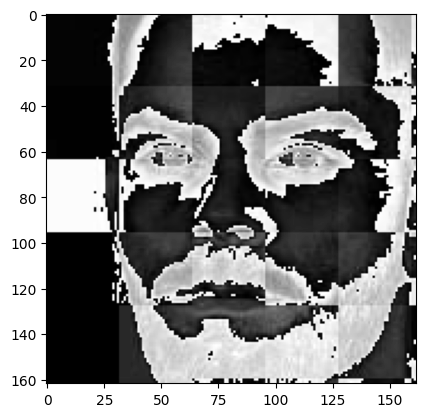

In [13]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    imArray = img

    # Check if image is already grayscale
    if len(imArray.shape) == 3:
        # Convert to grayscale
        imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255.0

    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# Assuming cropped_image is your input image
im_hr = w2d(cropped_image, 'db1', 5)
plt.imshow(im_hr, cmap='gray')
plt.show()


In [48]:
celebrity_file_names_disct

{'ms dhoni': ['/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni1.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni2.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni3.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni4.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni5.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni6.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni7.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni8.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni9.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni10.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni11.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni12.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni13.png',
  '/content/drive/MyDrive/Data/crop data setms dhoni/ms dhoni14.png'],
 'virat': ['/con

In [175]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_disct.keys():
  class_dict[celebrity_name] = count
  count = count +1
class_dict

{'ms dhoni': 0, 'virat': 1, 'Messi': 2}

In [176]:
x = []
y = []
for celebrity_name, training_files in celebrity_file_names_disct.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    scalled_raw_img = cv2.resize(img,(32,32))
    img_har = w2d(img,'db1',5)
    scalled_img_har = cv2.resize(img_har,(32,32))
    combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    x.append(combined_img)
    y.append(celebrity_name)


In [177]:
len(y)

71

In [178]:
32 * 32*3 +32*32 #raw image

4096

In [179]:
len(x) #pic

71

In [180]:
len(x[0]) #size of image

4096

In [181]:
32 * 32*3 +32*32#raw image

4096

In [182]:
x[0]

array([[ 29],
       [ 29],
       [ 29],
       ...,
       [240],
       [222],
       [216]], dtype=uint8)

In [183]:
#i will convert float and just to make sure the shape 162 by 4096
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(71, 4096)

In [185]:
x[0]

array([ 29.,  29.,  29., ..., 240., 222., 216.])

In [ ]:
#train the module

In [186]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [187]:
X_train, X_test ,y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=0)


pipe = Pipeline([('scaler' ,StandardScaler()),('svc' ,SVC(kernel = 'rbf',C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)



0.9333333333333333

In [188]:
len(X_test)

15

In [189]:
len(X_train)

56

In [190]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

       Messi       1.00      0.75      0.86         4
    ms dhoni       0.50      1.00      0.67         1
       virat       1.00      1.00      1.00        10

    accuracy                           0.93        15
   macro avg       0.83      0.92      0.84        15
weighted avg       0.97      0.93      0.94        15



In [191]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [192]:
model_params = {
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'svc__C': [0.1, 1, 10],
            'svc__gamma': [0.01, 0.1, 1]
        }

    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier_n_estimators':[1,5,10]

        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression_c':[1,5,10]

        }
    }
}

In [196]:
from sklearn.datasets import make_classification

#X_train, y_train = make_classification(n_samples=1000, n_features=20, random_state=42)

scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

                 model  best_score  \
0                  SVM    0.465152   
1         RandomForest    0.877273   
2  logistic_regression    0.787879   

                                    best_params  
0           {'svc__C': 0.1, 'svc__gamma': 0.01}  
1  {'randomforestclassifier__n_estimators': 50}  
2                  {'logisticregression__C': 5}  


In [197]:
best_estimators

{'SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=0.1, gamma=0.01, probability=True))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=50))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [201]:
best_estimators['SVM'].score(X_test,y_test)

0.6666666666666666

In [199]:
best_estimators['RandomForest'].score(X_test,y_test)

0.9333333333333333

In [204]:
best_estimators['logistic_regression'].score(X_test,y_test)

1.0

In [208]:
best_clf = best_estimators['logistic_regression']

In [209]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 4,  0,  0],
       [ 0,  1,  0],
       [ 0,  0, 10]])

Text(95.72222222222221, 0.5, 'Truth')

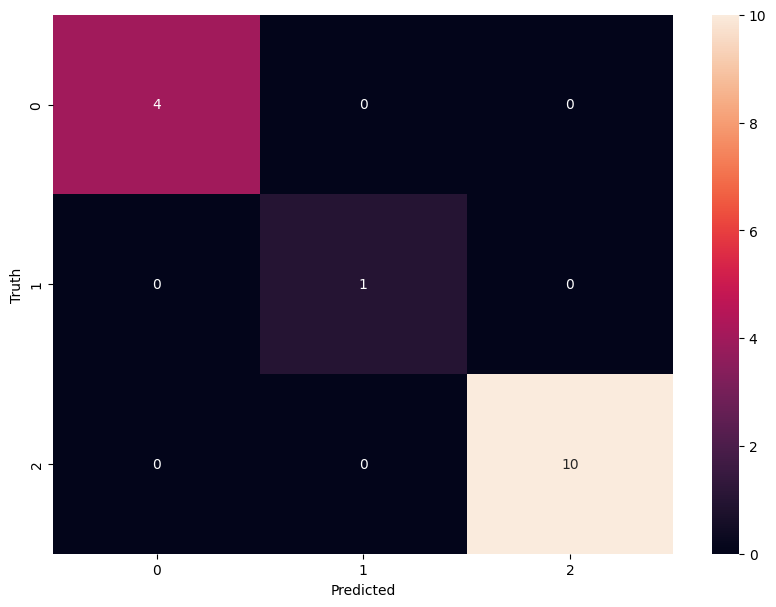

In [210]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [211]:
class_dict

{'ms dhoni': 0, 'virat': 1, 'Messi': 2}

In [212]:
pip install joblib

In [214]:
import joblib

joblib.dump(best_clf,'saved_model.pk1')

['saved_model.pk1']

In [215]:
import json
with open('class_dictionary.json','w')as f:
  f.write(json.dumps(class_dict))